In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
class Produto:
    def __init__(self, nome, espaco, valor):
        self.nome = nome
        self.espaco = espaco
        self.valor = valor

In [3]:
class Individuo:
    def __init__(self, produtos, limite):
        self.produtos = produtos
        self.limite = limite
        self.cromossomo = [random.choice([0, 1]) for _ in range(len(produtos))]
        self.nota_avaliacao = 0 # Valor Financeiro
        self.espaco_usado = 0

    def avaliacao(self):
        soma_valores = 0
        soma_espacos = 0
        for i in range(len(self.cromossomo)):
            if self.cromossomo[i] == 1:
                soma_valores += self.produtos[i].valor
                soma_espacos += self.produtos[i].espaco
            if soma_espacos > self.limite:
                soma_valores = 1  # Penalização se exceder o limite

        self.nota_avaliacao = soma_valores
        self.espaco_usado = soma_espacos

In [4]:
# @title
class AlgoritmoGenetico:
    def __init__(self, produtos, limite, tamanho_populacao, taxa_mutacao, geracoes):
        self.produtos = produtos
        self.limite = limite
        self.tamanho_populacao = tamanho_populacao
        self.taxa_mutacao = taxa_mutacao
        self.geracoes = geracoes
        self.notas_por_geracao = []  # Lista para armazenar as notas por geração
        self.lista_gerados = []  # Lista para armazenar os cromossomos gerados
        self.populacao = []
        self.geracao_melhor_individuo = -1

        for _ in range(tamanho_populacao):
          individuo = Individuo(produtos, limite)
          individuo.avaliacao()
          self.populacao.append(individuo)

        self.melhor_solucao = self.populacao[0]  # Inicializa com o primeiro indivíduo

    def ordena_populacao(self):
        self.populacao.sort(key=lambda ind: ind.nota_avaliacao, reverse=True)

    def seleciona_pai(self):
        soma_avaliacao = sum(ind.nota_avaliacao for ind in self.populacao)
        valor_sorteado = random.uniform(0, soma_avaliacao)
        soma = 0
        for i, ind in enumerate(self.populacao):
            soma += ind.nota_avaliacao
            if soma >= valor_sorteado:
                return i
        return len(self.populacao) - 1

    def crossover(self, pai1, pai2):
        corte = random.randint(1, len(pai1.cromossomo) - 1)
        filho1_cromossomo = pai1.cromossomo[:corte] + pai2.cromossomo[corte:]
        filho2_cromossomo = pai2.cromossomo[:corte] + pai1.cromossomo[corte:]

        filho1 = Individuo(self.produtos, self.limite)
        filho1.cromossomo = filho1_cromossomo
        filho1.avaliacao()

        filho2 = Individuo(self.produtos, self.limite)
        filho2.cromossomo = filho2_cromossomo
        filho2.avaliacao()

        return [filho1, filho2]

    def mutacao(self, individuo):
        for i in range(len(individuo.cromossomo)):
            if random.random() < self.taxa_mutacao:
                individuo.cromossomo[i] = 1 - individuo.cromossomo[i] # Troca 0 por 1 ou 1 por 0
        individuo.avaliacao()

    def visualizar(self, geracao):
        print(f"Geração {geracao + 1} - Nota: {self.populacao[0].nota_avaliacao:.2f} - Espaço Usado: {self.populacao[0].espaco_usado:.2f}")
        self.notas_por_geracao.append(self.populacao[0].nota_avaliacao)
        self.lista_gerados.append(self.populacao[0])

    def resolver(self):
      for geracao in range(self.geracoes):
          nova_populacao = []
          while len(nova_populacao) < self.tamanho_populacao:
              pai1 = self.seleciona_pai()
              pai2 = self.seleciona_pai()
              filhos = self.crossover(self.populacao[pai1], self.populacao[pai2])
              for filho in filhos:
                  self.mutacao(filho)
                  nova_populacao.append(filho)

          # Atualiza a melhor solução se necessário
          for individuo in nova_populacao:
              if individuo.nota_avaliacao > self.melhor_solucao.nota_avaliacao:
                print(f"Melhor Indivíduo:>> Geracao {geracao + 1} - Nota: {individuo.nota_avaliacao} - Espaço Usado: {individuo.espaco_usado}")
                self.melhor_solucao = individuo
                self.geracao_melhor_individuo = geracao + 1

          self.populacao = nova_populacao
          self.ordena_populacao()
          self.visualizar(geracao)  # Imprime a melhor geração atual


      print(f"Melhor Indivíduo>>> Geração: {self.geracao_melhor_individuo} - Nota: {self.melhor_solucao.nota_avaliacao} - Espaço Usado: {self.melhor_solucao.espaco_usado}")
      print("Produtos eleitos para preencher o volume:")
      for i in range(len(self.produtos)):
          if self.melhor_solucao.cromossomo[i] == 1:
              print(f"Nome: {self.produtos[i].nome} R${self.produtos[i].valor:.2f}")

    def plotar_grafico(self):
      espaco_usado = [p.espaco_usado for p in self.lista_gerados]

      fig, ax1 = plt.subplots()
      fig.suptitle('Evolução dos Indivíduos ao Longo de cada Geração')
      #fig.title.set_title('Evolução da Nota de Avaliação ao Longo das Gerações')

      color = 'tab:red'
      ax1.set_xlabel('Geração')
      ax1.set_ylabel('Nota de Avaliação', color=color)
      ax1.grid(True)
      ax1.plot(range(1, self.geracoes + 1), self.notas_por_geracao, color=color)
      ax1.tick_params(axis='y', labelcolor=color)

      ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

      color = 'tab:blue'
      ax2.set_ylabel('Volume Utilizado em m3', color=color)  # we already handled the x-label with ax1
      ax2.plot(range(1, self.geracoes + 1), espaco_usado, color=color)
      ax2.tick_params(axis='y', labelcolor=color)

      fig.tight_layout()  # otherwise the right y-label is slightly clipped
      fig.show()


In [5]:
produtos = [
        Produto("produto 01", 1.5, 999.9),
        Produto("produto 02", 0.5, 2911.12),
        Produto("produto 03", 0.8, 3999.9),
        Produto("produto 04", 0.7, 2999.0),
        Produto("produto 05", 1.2, 2499.9),
        Produto("produto 06", 0.6, 308.66),
        Produto("produto 07", 0.6, 429.9),
        Produto("produto 08", 0.5, 299.29),
        Produto("produto 09", 1.1, 1999.9),
        Produto("produto 10", 1.0, 3999.0)
    ]

limite = 5  # Limite de espaço em metros cúbicos
tamanho_populacao = 20
taxa_mutacao = 0.01
geracoes = 100

ag = AlgoritmoGenetico(produtos, limite, tamanho_populacao, taxa_mutacao, geracoes)
ag.resolver()

Melhor Indivíduo:>> Geracao 1 - Nota: 6518.07 - Espaço Usado: 2.3
Melhor Indivíduo:>> Geracao 1 - Nota: 11307.36 - Espaço Usado: 5.0
Melhor Indivíduo:>> Geracao 1 - Nota: 13016.970000000001 - Espaço Usado: 4.5
Melhor Indivíduo:>> Geracao 1 - Nota: 13148.48 - Espaço Usado: 4.4
Melhor Indivíduo:>> Geracao 1 - Nota: 14718.48 - Espaço Usado: 4.9
Geração 1 - Nota: 14718.48 - Espaço Usado: 4.90
Geração 2 - Nota: 14017.87 - Espaço Usado: 4.60
Geração 3 - Nota: 13148.48 - Espaço Usado: 4.40
Geração 4 - Nota: 14638.21 - Espaço Usado: 4.10
Geração 5 - Nota: 13148.48 - Espaço Usado: 4.40
Geração 6 - Nota: 13147.58 - Espaço Usado: 4.60
Geração 7 - Nota: 13147.58 - Espaço Usado: 4.60
Geração 8 - Nota: 13147.58 - Espaço Usado: 4.60
Geração 9 - Nota: 13147.58 - Espaço Usado: 4.60
Geração 10 - Nota: 13147.58 - Espaço Usado: 4.60
Geração 11 - Nota: 13147.58 - Espaço Usado: 4.60
Geração 12 - Nota: 13147.58 - Espaço Usado: 4.60
Geração 13 - Nota: 13147.58 - Espaço Usado: 4.60
Geração 14 - Nota: 13147.58 

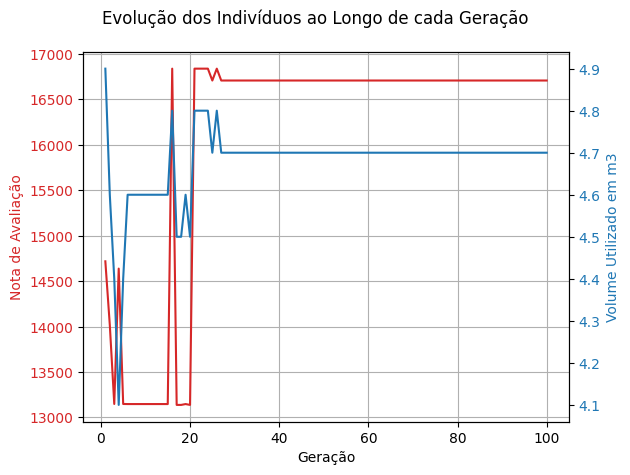

In [6]:
ag.plotar_grafico()